<a href="https://colab.research.google.com/github/KinzaRehman/python_practice/blob/main/automatidata_google.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


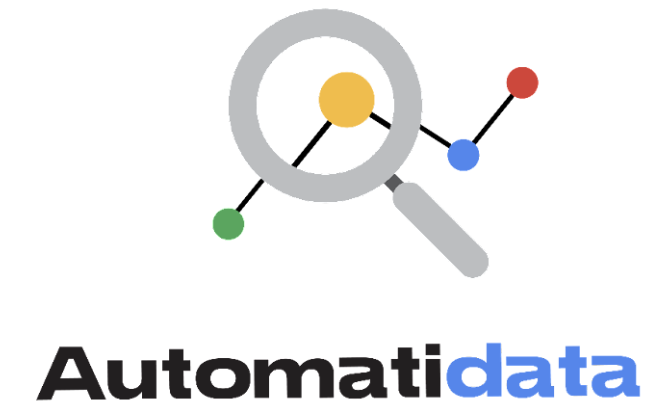

**Google Advanced Data Analytics Professional Certificate (Python case study):** Kinza Rehman

**Project goal:**

In this fictional scenario, the New York City Taxi and Limousine Commission (TLC) has approached the data consulting firm Automatidata to develop an app that enables TLC riders to estimate the taxi fares in advance of their ride.

**Background:**

Since 1971, TLC has been regulating and overseeing the licensing of New York City's taxi cabs, for-hire vehicles, commuter vans, and paratransit vehicles.

Automatidata works with its clients to transform their unused and stored data into useful solutions, such as performance dashboards, customer-facing tools, strategic business insights, and more. They specialize in identifying a client’s business needs and utilizing their data to meet those business needs.

Automatidata is consulting for the New York City Taxi and Limousine Commission (TLC). New York City TLC is an agency responsible for licensing and regulating New York City's taxi cabs and for-hire vehicles. The agency has partnered with Automatidata to develop a regression model that helps estimate taxi fares before the ride, based on data that TLC has gathered.

The TLC data comes from over 200,000 taxi and limousine licensees, making approximately one million combined trips per day.

**Scenario:**

You have received notice that the recently submitted New York City TLC project proposal has been approved. The Automatidata team now has access to the New York City TLC data to analyze, identify key variables, and prepare for exploratory data analysis.

In [73]:
#Import the libraries that will be used and the data...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')
print("Lets begin our data exploration TLC")


Lets begin our data exploration TLC


In [38]:
#Understanding our data, lets view the first 10 rows
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [39]:
#What is the information stored in our data? with df.info() rangeindex, data type, NaN, and the colums within the data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [10]:
#What is the distribution of each varaible?  count, mean, std, min, max, 25%, 50%, 75%.
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


**Understanding the data- Investigate the varaibles**

In [19]:
# Sort by trip_distance from maximum to minimum
df_sorted_distance = df.sort_values(by = 'trip_distance', ascending= False)
df_sorted_distance.head(10)
df_sorted_distance.tail(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
13359,3055315,1,01/12/2017 7:19:36 AM,01/12/2017 7:19:56 AM,1,0.0,5,N,1,1,1,75.0,0.0,0.0,18.65,18.0,0.3,111.95
5588,85254119,2,10/10/2017 4:26:12 PM,10/10/2017 4:26:26 PM,1,0.0,1,N,170,170,1,2.5,1.0,0.5,5.20,0.0,0.3,9.50
20931,47340765,1,06/29/2017 7:27:02 PM,06/29/2017 7:27:22 PM,1,0.0,1,N,162,162,3,2.5,1.0,0.5,0.00,0.0,0.3,4.30
19712,1324241,1,01/05/2017 12:40:16 PM,01/05/2017 12:40:23 PM,1,0.0,1,N,48,48,1,2.5,0.0,0.5,0.95,0.0,0.3,4.25
13827,1514377,1,01/20/2017 8:40:05 AM,01/20/2017 8:40:25 AM,1,0.0,1,N,238,238,1,2.5,0.0,0.5,0.65,0.0,0.3,3.95
2440,63574825,1,07/26/2017 10:26:58 PM,07/26/2017 10:26:58 PM,1,0.0,1,N,162,264,2,5.5,0.5,0.5,0.00,0.0,0.3,6.80
15916,47368116,1,06/29/2017 7:30:30 PM,06/29/2017 7:43:29 PM,1,0.0,1,N,79,148,3,8.5,1.0,0.5,0.00,0.0,0.3,10.30
1350,91619825,2,10/30/2017 8:20:29 AM,10/30/2017 8:20:38 AM,1,0.0,1,N,193,193,1,2.5,0.0,0.5,0.66,0.0,0.3,3.96
246,78660848,1,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
17788,58079289,1,07/08/2017 12:54:02 AM,07/08/2017 12:55:03 AM,2,0.0,1,N,158,158,3,2.5,0.5,0.5,0.00,0.0,0.3,3.80


In [13]:
#is the value normal? lets inspect the threshold
max_trip_distance = df_sorted_distance['trip_distance'].max()
min_trip_distance = df_sorted_distance['trip_distance'].min()
print(f"Maximum trip distance: {max_trip_distance}, Minimum trip distance {min_trip_distance}")


Maximum trip distance: 33.96, Minimum trip distance 0.0


In [15]:
#Sorting by the varaible total_amount
df_sorted_amount = df.sort_values(by = 'total_amount',ascending= False)
df_sorted_amount.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8476,11157412,1,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29
20312,107558404,2,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
12511,107108848,2,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74
15474,55538852,2,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80


In [20]:
#the total amount at the bottom 5
df_sorted_amount.tail(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
11204,58395501,2,07/09/2017 7:20:59 AM,07/09/2017 7:23:50 AM,1,0.64,1,N,50,48,3,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3
14714,109276092,2,12/24/2017 10:37:58 PM,12/24/2017 10:41:08 PM,5,0.40,1,N,164,161,4,-4.0,-0.5,-0.5,0.0,0.0,-0.3,-5.3
17602,24690146,2,03/24/2017 7:31:13 PM,03/24/2017 7:34:49 PM,1,0.46,1,N,87,45,4,-4.0,-1.0,-0.5,0.0,0.0,-0.3,-5.8
20698,14668209,2,02/24/2017 12:38:17 AM,02/24/2017 12:42:05 AM,1,0.70,1,N,65,25,4,-4.5,-0.5,-0.5,0.0,0.0,-0.3,-5.8
12944,29059760,2,04/08/2017 12:00:16 AM,04/08/2017 11:15:57 PM,1,0.17,5,N,138,138,4,-120.0,0.0,0.0,0.0,0.0,-0.3,-120.3


In [16]:
#The maximum and minimum total amounts are as follow
max_total_amount = df_sorted_amount['total_amount'].max()
min_total_amount = df_sorted_amount['total_amount'].min()
print(f"Maximum total amount: {max_total_amount}, Minimum total amount {min_total_amount}")


Maximum total amount: 1200.29, Minimum total amount -120.3


In [22]:
#compare the sorted results
common_indices = df_sorted_distance.index.intersection(df_sorted_amount.index)
print(f"The number of common rows present are {len(common_indices)}")
df.loc[common_indices].head(5)

The number of common rows present are 22699


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38


In [23]:
#how many different payment types do we have? lets count each payment type:
payment_count = df['payment_type'].value_counts()
print(payment_count)

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64


According to the data dictionary, the payment method was encoded as follows:

1 = Credit card
2 = Cash
3 = No charge
4 = Dispute
5 = Unknown
6 = Voided trip

In [26]:
#what is the average tip that used a credit card for payment and cash?
avg_trip_credit_card = df[df['payment_type'] == 1]['tip_amount'].mean()
avg_trip_cash = df[df['payment_type'] == 2]['tip_amount'].mean()
print(f"The average tip for credit card users is {avg_trip_credit_card}, the average for cash is {avg_trip_cash}")

The average tip for credit card users is 2.7298001965280054, the average for cash is 0.0


In [30]:
#How many times do we see each vendors ID within the data?
vendor_count = df['VendorID'].value_counts()
print(vendor_count)

VendorID
2    12626
1    10073
Name: count, dtype: int64


In [31]:
#what is the mean total amount for the Vendors?
mean_total_amount = df.groupby('VendorID')['total_amount'].mean()
print(mean_total_amount)

VendorID
1    16.298119
2    16.320382
Name: total_amount, dtype: float64


In [32]:
#filter the data for credit card payments only
df_credit_card = df[df['payment_type'] == 1]
print(df_credit_card)


       Unnamed: 0  VendorID    tpep_pickup_datetime   tpep_dropoff_datetime  \
0        24870114         2   03/25/2017 8:55:43 AM   03/25/2017 9:09:47 AM   
1        35634249         1   04/11/2017 2:53:28 PM   04/11/2017 3:19:58 PM   
2       106203690         1   12/15/2017 7:26:56 AM   12/15/2017 7:34:08 AM   
3        38942136         2   05/07/2017 1:17:59 PM   05/07/2017 1:48:14 PM   
5        23345809         2   03/25/2017 8:34:11 PM   03/25/2017 8:42:11 PM   
...           ...       ...                     ...                     ...   
22692    60425673         1   07/16/2017 3:22:51 AM   07/16/2017 3:40:52 AM   
22693    67858616         2  08/10/2017 10:20:04 PM  08/10/2017 10:29:31 PM   
22695    66632549         2   08/06/2017 4:43:59 PM   08/06/2017 5:24:47 PM   
22697    60217333         2  07/15/2017 12:56:30 PM   07/15/2017 1:08:26 PM   
22698    17208911         1   03/02/2017 1:02:49 PM   03/02/2017 1:16:09 PM   

       passenger_count  trip_distance  RatecodeID s

In [34]:
#filter the credit card only data for passanger count only
df_credit_card_passanger = df_credit_card[['passenger_count', 'tip_amount']]
print(df_credit_card_passanger)

       passenger_count  tip_amount
0                    6        2.76
1                    1        4.00
2                    1        1.45
3                    1        6.39
5                    6        2.06
...                ...         ...
22692                1        4.05
22693                1        1.76
22695                1       14.64
22697                1        1.70
22698                1        2.35

[15265 rows x 2 columns]


In [40]:
## Calculate the average tip amount for each passenger count (credit card payments only)
avg_tip_by_passenger = df_credit_card_passanger.groupby('passenger_count')['tip_amount'].mean()
print(avg_tip_by_passenger)

passenger_count
0    2.610370
1    2.714681
2    2.829949
3    2.726800
4    2.607753
5    2.762645
6    2.643326
Name: tip_amount, dtype: float64


**Exploratory Data Analysis:**

-Descriptive statistics

-Correlation analysis

-Vendor Performance Analysis

In [63]:
descriptive_statistics= df.describe()
print(descriptive_statistics.head(5))

         Unnamed: 0      VendorID  passenger_count  trip_distance  \
count  2.269900e+04  22699.000000     22699.000000   22699.000000   
mean   5.675849e+07      1.556236         1.642319       2.913313   
std    3.274493e+07      0.496838         1.285231       3.653171   
min    1.212700e+04      1.000000         0.000000       0.000000   
25%    2.852056e+07      1.000000         1.000000       0.990000   

         RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count  22699.000000  22699.000000  22699.000000  22699.000000  22699.000000   
mean       1.043394    162.412353    161.527997      1.336887     13.026629   
std        0.708391     66.633373     70.139691      0.496211     13.243791   
min        1.000000      1.000000      1.000000      1.000000   -120.000000   
25%        1.000000    114.000000    112.000000      1.000000      6.500000   

              extra       mta_tax    tip_amount  tolls_amount  \
count  22699.000000  22699.000000  22699.0000

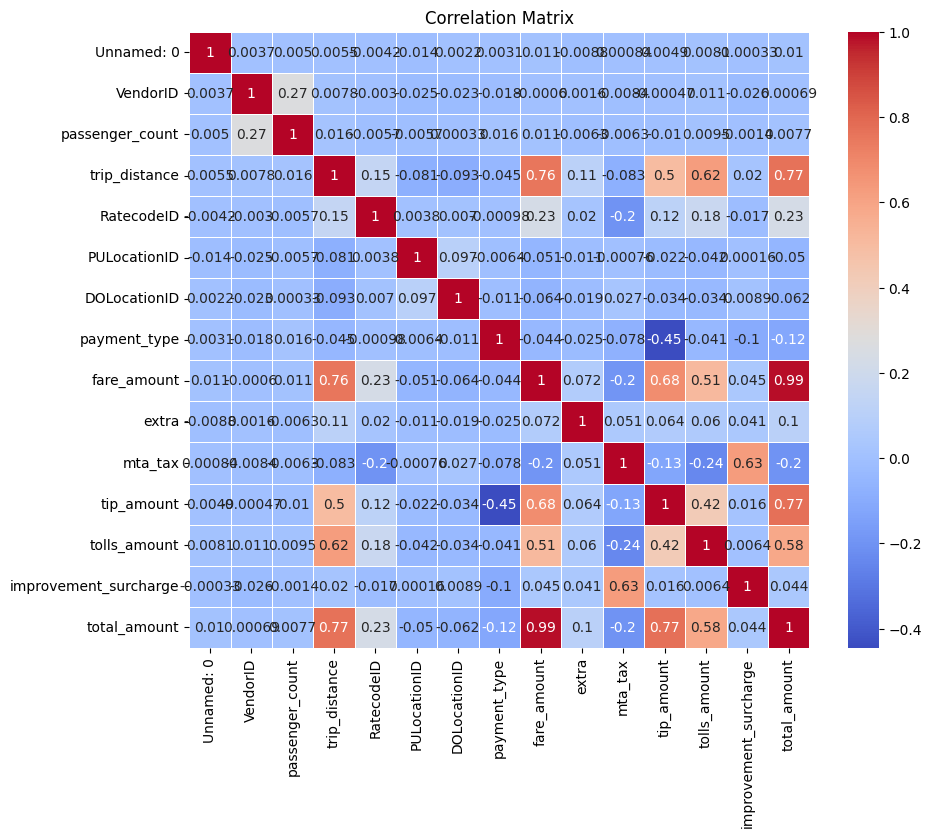

In [67]:
# Calculate and plot the correlation matrix
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [71]:
# Analyzing total amount and trip count by vendor
vendor_analysis = df.groupby('VendorID')['total_amount'].agg(['mean', 'count']).reset_index()
vendor_analysis.columns = ['VendorID', 'Average Total Amount', 'Trip Count']
print(vendor_analysis)


   VendorID  Average Total Amount  Trip Count
0         1             16.298119       10073
1         2             16.320382       12626


# **VISUALS**

---








In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

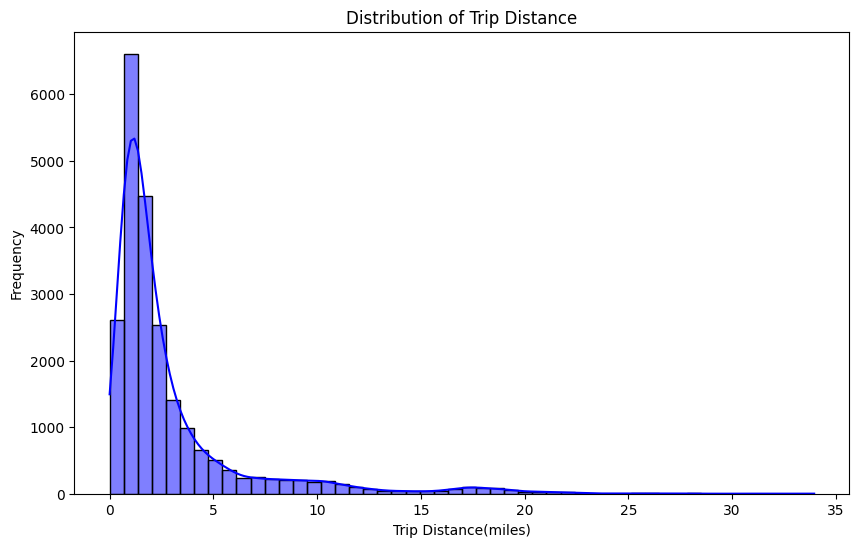

In [74]:
#What is the distribution of Trip distance?
plt.figure(figsize = (10,6))
sns.histplot(df['trip_distance'], bins = 50, kde = True, color='blue', line_kws={'color': 'red'})
plt.title('Distribution of Trip Distance')
plt.xlabel('Trip Distance(miles)')
plt.ylabel('Frequency')
plt.show()

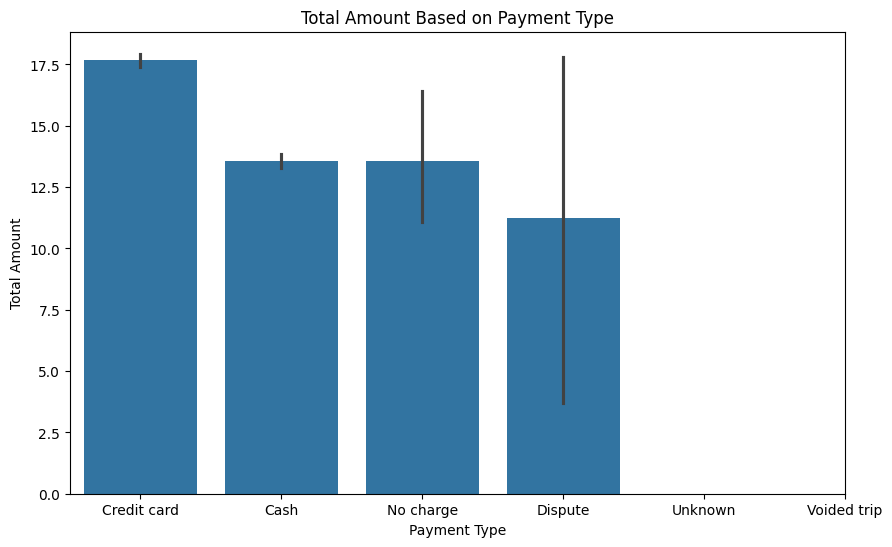

In [54]:
#What is the total amount based on the payment type?
plt.figure(figsize = (10,6))
sns.barplot(x = 'payment_type', y = 'total_amount', data = df)
plt.title('Total Amount Based on Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Total Amount')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Credit card', 'Cash', 'No charge', 'Dispute', 'Unknown', 'Voided trip'])
plt.show()

Based on this we see that there are no unknown payment types or voided trips included within the data. This leaves a margin for error.

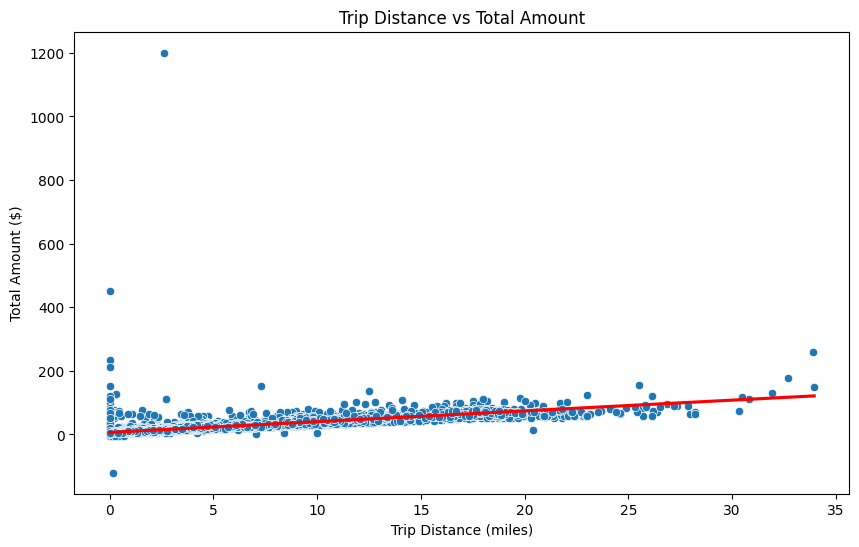

In [60]:
#What is the distance traveled VS the total amount?
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='total_amount', data=df)
sns.regplot(x='trip_distance', y='total_amount', data=df, scatter=False, color='red')
plt.title('Trip Distance vs Total Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Total Amount ($)')
plt.show()

# **Executive Summary Key Points:**
-Within the average fare amount, the trip distance and the type of payment method used there is varaince. The distance per fare can lead to increase in revenue.

-The most used card cases is **Credit Cards**, they also show higher amounts of tips, limiting different payment methods can increase vendor revenue.

-The **trip distance** and the **total amount** showcases a correlation of profit. We have outliers that demonstrate a short distance but a high yield in revenue. The profitability can be maximized based on TLC time use case.

-The app can estimate fare cost based on ** Trip distance, rate code, time of day, tolls, surchanrge** and **payment method**.

